<a href="https://colab.research.google.com/github/hunter-teacher-cert/fall-2020-ethics-work-dmoscoe/blob/master/Seat_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIRO First Board (Sangmin)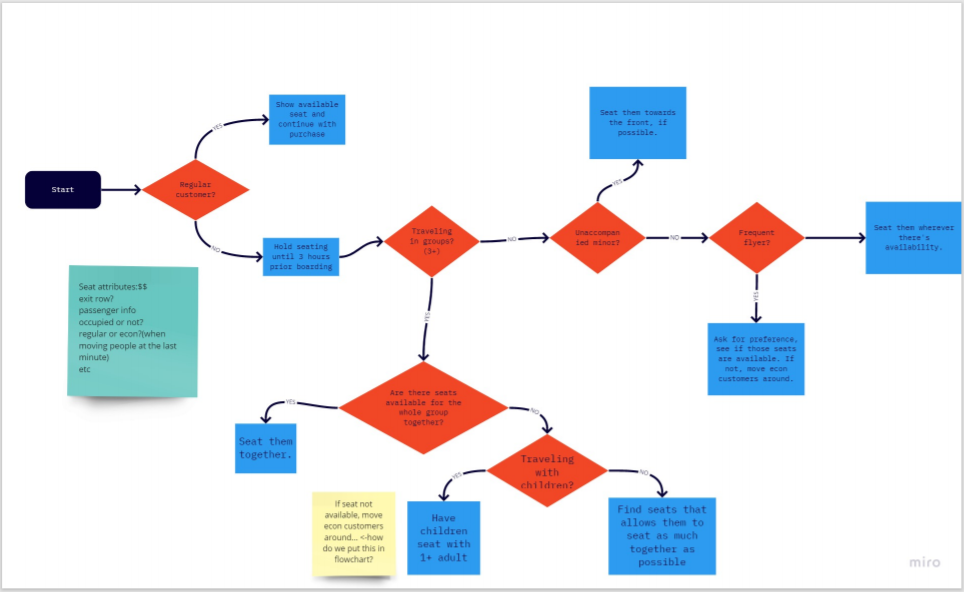

MIRO Second Board (Daniel)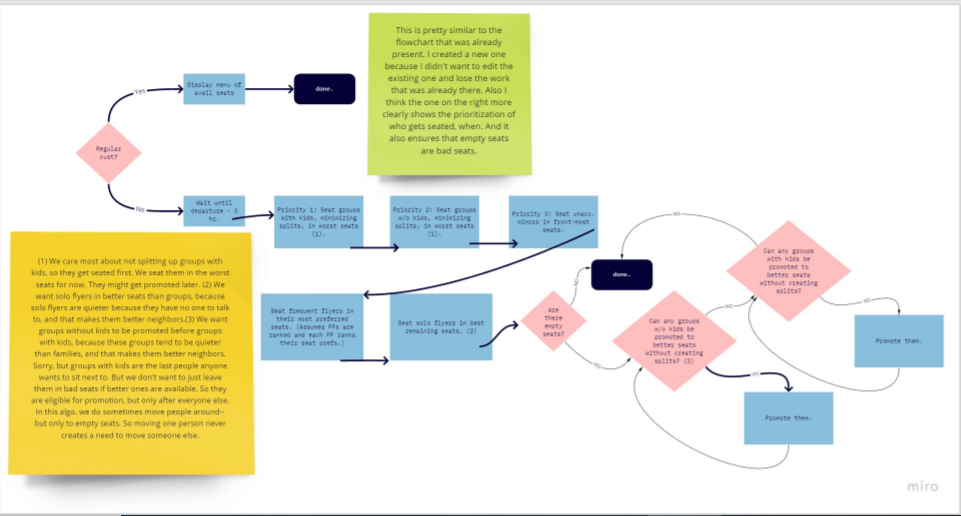

Pat's original comment:

The passenger ranking procedure will essentially rank the passengers into one large priority queue with the following ranking strata:
groups(2+) with children (highest rank)
groups(2+)
unaccompanied minors
solo travelers (lowest rank)
Two questions:
Would you like to see any change in the "layering"? - (It's really easy to do so no trouble whatsoever.)
For your purposes, would it be easier if I then put the groups into their own individual queues/arrays/list/etc according to their ranking so that you could work with one group at a time or will one long queue suffice?


Pat's Summary:

Things to do:
1.    Seat regular customers who pay extra to select their seat.
2.    Create Passenger class with the following as possible attributes:
- priority number
-seat
-traveling with child indicator (Boolean)
-age ( to identify unaccompanied minors)
- ticket number ( first passenger to buy a ticket is 1, second is number 2…or something similar)
-pod number( used to identify the passengers travelling together as a group.
( 4 people traveling together would all have the same pod number. Each individual passenger would also have a pod number. Perhaps these can be related to the ticket number?)
3.    Have the pods of passengers stored someway that allows them to be pulled one pod at a time. (The PODS DO NOT HAVE TO SORTED, just stored in a list/array/etc. The ranking function just calls each “pod” and assigns the same ranking/priority to each passenger in the pod)


Alonso's Original Pseudocode

Algorithm for seat assignment on an airplane:
-	Regular customers choose their seat
-	Economy customers are assigned seats
Decisions:
-	Economy customers will receive assignments 3 hrs. prior to departure
-	Larger groups will receive priority
-	Frequent Flyers will receive priority within the same size groupings

Data Structure(would best be a class) :
-	2D array of objects, columns will be translated to letters for display
o	Minimum information:
1.	Occupied/Available (Boolean)
2.	Priority (extra space, first class, exit row…) (Boolean)
3.	Price (Float) – combined with #3 for full “value” of seat
4.	Customer’s name (String)
5.	Frequent Flyer? (Boolean)
6.	Miles (Integer)
7.	Group size (Integer)
8.	Seats of other group members (1D array of seats).  
•	Seats could be stored in a single 4 digit integer RRCC (row,row,column,column), easily decoded to find each seat.  
•	Should be dynamic (linked list, ArrayList, etc.).  
•	It will not change much, and the size is determined by #7.
-	1D Array of objects for customers without a seat assignment (Economy)
o	Minimum information:
1.	Customer’s name (String)
2.	Frequent Flyer? (Boolean)
3.	Miles (Integer)
4.	Group size (Integer)
-	NumberOfSeats - Global (or attribute) – Integer.
o	Starts as the number of available seats on the airplane.  
o	Decreased by the group size every time a ticket is sold
Algorithm:
1.	If NumberOfSeats <= GroupSize then “Sorry, plane is full!” or,  “Only x number of seats are currently available.”
2.	Else If Regular Customer:
a)	Display availability 
b)	Record their choice (toggle the seat to occupied)
c)	Collect the rest of the information
3.	Else If Economy Customer:
a)	Collect the required information
4.	3 hrs before departure:
a)	Start assigning Economy customers



In [ ]:
### Pats code - Please dont erase

import math
from queue import PriorityQueue
podsize = 6       # the number of passengers traveling in a group
childcount = 0      
ffmiles = 0       # frequent flyer miles of the group or individual traveling together
ticketnumber = 0  # a way to identify order passengers purchased tickets. 
Customerdata = 1  ### value is to just simulate customer data found in the passengers profile
Childcheck = True ### value is to just simulate customer data found in the passengers profile
Age = 6           ### value is to just simulate customer data found in the passengers profile
Group = 8         ### value is to just simulate customer data found in the passengers profile


class Passenger(object):
    
    def __init__(self, name, priority):
        self.name = name
        self.priority = priority


passenger1 = Passenger("Maude", 5)
passenger2 = Passenger("Barleen", 9)
passenger3 = Passenger("David", 1)
passenger4 = Passenger("Halen" , 3)
passenger5 = Passenger("Van" , 2)
passenger0 = Passenger("Eddy" , 1)
passengers = [passenger4, passenger1, passenger5, passenger3, passenger2, passenger0]


### These lists will hold the passengers that have been sorted to them
GroupwithChildren = []
Group = []
Solo = []
Unaccompanied = []


### It takes in a 'pod' of passengers travelling together (solo or group size).
### and generates a ranking number based on fflyer miles, early ticket purchase,
### and category the passengers fall into. The same number is used for each
### passenger in the group as a means of keeping them together.

### It then does two things:
### 1. Stores the ranking in each passengers profile 
### 2. Creates a list of the passengers in each category

for x in range(0, podsize):
    ffmiles = ffmiles + Customerdata
    if Childcheck:   ### counts number of children in group
        if podsize >1:                    ### Group with children
            childcount = childcount + 1
            Childcheck = True
            Group = 3000000
        else:                             ### Unacompanied Minors
            Group = 1000000
    elif podsize >1:                      ### Group
        Group = 2000000
    else:
        Group = 0                         ### Solo Travelers

### Generates the Ranking number
        
Ranking = (Group + ffmiles + podsize + ticketnumber)


### Assigns the Ranknig to each member in the the 'pod'
print ("Pod check")
print ("Passenger and Ranking")
for x in range(0, podsize):
    passengers[x].priority = Ranking
    print (passengers[x].name , passengers[x].priority)



### This section of code places every passenger into the appropriate list



for x in range(len(passengers)):
 
    if passengers[x].priority < 1000000:
        Solo.append(passengers[x]) 
               
    elif passengers[x].priority < 2000000:
        Unaccompanied.append(passengers[x])
           
    elif passengers[x].priority < 3000000:
        Group.append(passengers[x])
             
    else: 
        GroupwithChildren.append(passengers[x])
      
 

### A print to check that each member has the appropriate priority number.
print ("Check to see if grouping worked")
for x in range(0,len(GroupwithChildren)):
    print (GroupwithChildren[x].name,GroupwithChildren[x].priority)
    

Pod check
Passenger and Ranking
Halen 3000012
Maude 3000012
Van 3000012
David 3000012
Barleen 3000012
Eddy 3000012
Check to see if grouping worked
Halen 3000012
Maude 3000012
Van 3000012
David 3000012
Barleen 3000012
Eddy 3000012


In [ ]:
# Izagma ALonso's code
# Modification of Seat class 
import random

ROWS = 20
COLUMNS = 6
REGULAR = 40
total_seats = ROWS * COLUMNS

class Seat(object):
    def __init__(self, r, c, value):
        letter = ["a","b","c","d","e","f"]
        self.occupied = False;
        # automatically creates the seat's location from the row & column pair
        self.loc = str(r+1) + letter[c] 
        self.value = value;
 
# creates the plane
def make_plane(rows, columns):
  # value = 100    # start value 100
  plane = [[Seat(r,c,100*r+c+1) for c in range(columns)] for r in range(rows)]
  """
  value = 1
  for r in range(rows):
    for c in range(columns):
        plane[r][c] = Seat(r,c,value)
        value += 1
  """
  return plane

# prints the plane indicating available seats
def print_plane(plane):
  print("-----------------PLANE---------------------")
  # print the plane seats
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      # add two spaces for the aisle
      if c == 3:
        print("      ",end=" ")
      # adjust for smaller row numbers
      if r < 9:
        print("",end=" ")
      print(plane[r][c].loc,end=" ")
      # -- indicates available, XX indicates occupied
      if plane[r][c].occupied:
        print("XX",end=" ")
      else:
        print("--",end=" ")
    print()

# Occupies the specified seat
def occupy_seat(plane,r,c):
  # Only occupy it if it is free,
  # Otherwise return false
  # print(r,c)
  if plane[r][c].occupied:
    return False
  else:
    plane[r][c].occupied = True
    return True

# occupy a row
def occupy_row(plane,row):
  for c in range(len(plane[row])):
    if not occupy_seat(my_plane,row,c):
      row += 1
    if row > ROWS:
      return -1
  return row

# If all children traveling alone have been seated
# the first row can be freed
def unoccupy_seat(plane,r,c):
  plane[r][c].occupied = False

# Return number of occupied seats
def occupancy(plane):
  occupied_seats = 0
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      if plane[r][c].occupied:
        occupied_seats += 1
  return occupied_seats 

# List of available seats
def available_seats(plane):
  seats = []
  i = 0
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      if not plane[r][c].occupied:
        seats.append(plane[r][c].value)
      else:
        seats.append(0)
    i += 1
  return seats

# main
#          0   1   2   3   4   5
letter = ["a","b","c","d","e","f"]
my_plane = make_plane(ROWS,COLUMNS)       # make a plane
# print_plane(my_plane)                     # Print the plane's current Status

# Occupy 25 of the plane
occupied = 0
while occupied < REGULAR:
      pod_size = random.randint(0,10)
      """ Not nec seated together
      if pod_size == 6:
        OK = occupy_row(random.randint(0,ROWS))
        if not OK:
          pod_size = pod_size/2;
      else:
      """
      r = random.randint(0,ROWS-1)
      c = random.randint(0,COLUMNS-1)
      for p in range(pod_size):
          col = c
          row = r
          success = occupy_seat(my_plane,r,c)
          if c < COLUMNS-1:
            if col > 0:
              c = 0;
              col = COLUMNS
            else:
              c += 1
          else:
            if r < ROWS-1:
              r += 1
            else:
              quit
      """  Ignore errors for now
      if not success:
        s = str(r) + letter[c]
        print("Seat "+ s +" is already occupied.")
      """
      occupied = occupancy(my_plane)

print_plane(my_plane)                     # Print the plane's current Status

seats = available_seats(my_plane)
print(seats)

-----------------PLANE---------------------
 1a --  1b --  1c --         1d --  1e --  1f XX 
 2a --  2b --  2c --         2d --  2e --  2f XX 
 3a XX  3b XX  3c --         3d --  3e --  3f XX 
 4a --  4b --  4c --         4d --  4e --  4f XX 
 5a --  5b --  5c --         5d --  5e --  5f XX 
 6a --  6b --  6c --         6d --  6e --  6f XX 
 7a XX  7b XX  7c --         7d --  7e --  7f XX 
 8a --  8b --  8c --         8d --  8e --  8f XX 
 9a --  9b --  9c --         9d --  9e --  9f XX 
10a XX 10b XX 10c XX        10d -- 10e -- 10f XX 
11a XX 11b XX 11c --        11d -- 11e -- 11f XX 
12a -- 12b -- 12c --        12d -- 12e -- 12f XX 
13a XX 13b XX 13c XX        13d -- 13e -- 13f XX 
14a -- 14b -- 14c --        14d -- 14e -- 14f XX 
15a -- 15b -- 15c --        15d -- 15e -- 15f XX 
16a XX 16b XX 16c --        16d XX 16e -- 16f XX 
17a XX 17b XX 17c --        17d -- 17e -- 17f XX 
18a -- 18b -- 18c --        18d -- 18e -- 18f XX 
19a XX 19b XX 19c --        19d -- 19e -- 19f XX 
20a XX

In [ ]:
# Alonso
# Simple Main Logic - lots of pieces to write

# This is a simple routine, no priority or complex seating
# If it works we can ellaborate from here
# that is the best way to design, like Tofr said

# the plane must be created once and stored from use to use or stay in memory all the time
mu_plane=create_plane(20,6)
regular = print("Do you want to choose your seat? (yes or no)")
# add code to account for caps and y or n instead
if regular == "yes":
  print_plane(my_plane)
  seat = print("which seat do you want?")
  # check for valid seat
  # decipher into row and column
  occupy_seat(my_plane,r,c)
else:
  #collect passanger(s) information

if DEPARTURE - 3 == NOW:
  assign_economy()
  # sort first by children yes followed by no
  # special case child alone - seat on first row (should be reserved)
  # then sort by group size within the children
  # seat all passangers with children
  # make sure none is alone
  # sort the rest by group size
  # within same group size, sort by frequent flyer miles
  # now seat in order



In [ ]:
#Daniel's code
import random

class Passenger(object):
    
    def __init__(self, name, priority, pod, podsize, podtype, age, ticketnumber, ffmiles):
        self.name = name
        self.priority = priority
        self.pod = pod
        self.podsize = podsize
        self.podtype = podtype
        self.age = age
        self.ticketnumber = ticketnumber
        self.ffmiles = ffmiles

assignments = []

def GroupsWithChildrenAssigner(passengers, seats):
    """Assumes passengers is a list of Passenger objects. Assumes seats is a list of seat rankings, where the index of the ranking is interpreted as the seat being ranked (e.g., the ranking at index = 0 is the ranking of seat A1). Returns assignments, a list of [passenger, seatIndex] pairs."""
    """A value of 0 in seats represents an occupied seat."""

    for i in range(len(passengers)):
        worstRankingPassengerIndex = 0
        worstRankingSeatIndex = 0
        
        for j in range(len(passengers)):
                if passengers[j].priority < passengers[worstRankingPassengerIndex].priority:
                    worstRankingPassengerIndex = j #Find the highest-ranking passenger, who will have the highest priority value.
        
        for k in range(len(seats)):
            if seats[k] > seats[worstRankingSeatIndex]:
                worstRankingSeatIndex = k #Find the worst-ranking seat, which will have the highest priority value.
    
        assignments.append([passengers[worstRankingPassengerIndex], worstRankingSeatIndex])
        passengers.pop(worstRankingPassengerIndex)
        seats[worstRankingSeatIndex] = 0
    
    return assignments

def GroupsWithNoChildrenAssigner(passengers, seats):
    """Identical to GroupsWithChildrenAssigner. Only difference is that this should run after GroupsWithChildrenAssigner."""
    
    for i in range(len(passengers)):
        worstRankingPassengerIndex = 0
        worstRankingSeatIndex = 0
        
        for j in range(len(passengers)):
                if passengers[j].priority < passengers[worstRankingPassengerIndex].priority:
                    worstRankingPassengerIndex = j #Find the highest-ranking passenger, who will have the highest priority value.
        
        for k in range(len(seats)):
            if seats[k] > seats[worstRankingSeatIndex]:
                worstRankingSeatIndex = k #Find the worst-ranking seat, which will have the highest priority value.
    
        assignments.append([passengers[worstRankingPassengerIndex], worstRankingSeatIndex])
        passengers.pop(worstRankingPassengerIndex)
        seats[worstRankingSeatIndex] = 0
    
    return assignments

def SoloAssigner(passengers, seats):
    """Places solo travelers in the best available seats."""
    
    for i in range(len(passengers)):
        
        bestRankingSeatIndex = 0
        for h in range(len(seats)):
            if (seats[h] > 0 and bestRankingSeatIndex == 0):
                bestRankingSeatIndex = h
        
        bestRankingPassengerIndex = 0
        
        for j in range(len(passengers)):
            if passengers[j].priority > passengers[bestRankingPassengerIndex].priority:
                bestRankingPassengerIndex = j
        
        for k in range(len(seats)):
            if (seats[k] < seats[bestRankingSeatIndex] and seats[k] != 0):
                bestRankingSeatIndex = k
        
        assignments.append([passengers[bestRankingPassengerIndex], bestRankingSeatIndex])
        passengers.pop(bestRankingPassengerIndex)
        seats[bestRankingSeatIndex] = 0
      
    return assignments








###TESTING###
    
##This shows a group of passengers divided into three different lists depending on their podtype. Then it runs the assigner for each list. It displays the seat assignments after each assigner is run, as well as the updated seat array, which will show new 0s where people have been seated.
    
##What we still need is a way to promote groups without breaking them up.

passenger1 = Passenger("Maude", 9, 23, "GroupWithChildren")
passenger2 = Passenger("Barleen", 9, 23, "GroupWithChildren")
passenger3 = Passenger("David", 4, 24, "GroupWithChildren")
passenger4 = Passenger("Blitzen", 4, 24, "GroupWithChildren")
passenger5 = Passenger("Cleopatra", 4, 24, "GroupWithChildren")
passenger6 = Passenger("Phyllis", 5, 29, "Solo")
passenger7 = Passenger("Carl", 3, 16, "GroupWithNoChildren")
passenger8 = Passenger("Harriet", 3, 16, "GroupWithNoChildren")
passenger9 = Passenger("Eddie", 8, 17, "GroupWithNoChildren")
passenger10 = Passenger("Laura", 8, 17, "GroupWithNoChildren")
passenger11 = Passenger("Steve", 2, 11, "Solo")

##Builds a list of seats, assuming that a bunch of those seats have been already taken.

seats = []
for i in range(120):
    seats.append(i + 1000)

for i in range(40):
    seats[random.randint(0,119)] = 0

print()
print(*seats, sep = ',')
print()

PassengersInGroupsWithChildren = [passenger1, passenger2, passenger3, passenger4, passenger5]
PassengersInGroupsWithNoChildren = [passenger7, passenger8, passenger9, passenger10]
PassengersSolo = [passenger6, passenger11]

x = GroupsWithChildrenAssigner(PassengersInGroupsWithChildren, seats)
for i in range(len(x)):
    print("(" + x[i][0].name + ", " + str(x[i][1]) + ")")

print()
print(*seats, sep = ',')
print()
    
y = GroupsWithNoChildrenAssigner(PassengersInGroupsWithNoChildren, seats)
for a in range(len(y)):
    print("(" + y[a][0].name + ", " + str(y[a][1]) + ")")

print()
print(*seats, sep = ',')
print()

z = SoloAssigner(PassengersSolo, seats)
for a in range(len(z)):
    print("(" + z[a][0].name + ", " + str(z[a][1]) + ")")

print()
print(*seats, sep = ',')
print()



1000,1001,0,0,1004,0,1006,1007,1008,0,1010,0,1012,1013,0,1015,1016,0,0,1019,1020,1021,1022,1023,1024,0,0,1027,1028,1029,1030,0,1032,1033,1034,0,1036,1037,1038,1039,0,1041,1042,1043,0,0,1046,0,0,1049,1050,1051,1052,1053,1054,1055,0,0,0,1059,0,1061,1062,1063,0,1065,1066,0,1068,0,1070,1071,0,0,1074,1075,1076,1077,1078,1079,0,1081,1082,1083,1084,0,1086,1087,0,1089,1090,0,1092,1093,0,1095,1096,1097,0,1099,1100,1101,1102,1103,1104,1105,1106,0,1108,1109,1110,1111,0,1113,1114,1115,0,0,1118,1119

(David, 119)
(Blitzen, 118)
(Cleopatra, 115)
(Maude, 114)
(Barleen, 113)

1000,1001,0,0,1004,0,1006,1007,1008,0,1010,0,1012,1013,0,1015,1016,0,0,1019,1020,1021,1022,1023,1024,0,0,1027,1028,1029,1030,0,1032,1033,1034,0,1036,1037,1038,1039,0,1041,1042,1043,0,0,1046,0,0,1049,1050,1051,1052,1053,1054,1055,0,0,0,1059,0,1061,1062,1063,0,1065,1066,0,1068,0,1070,1071,0,0,1074,1075,1076,1077,1078,1079,0,1081,1082,1083,1084,0,1086,1087,0,1089,1090,0,1092,1093,0,1095,1096,1097,0,1099,1100,1101,1102,1103,1104,110

In [ ]:
### It takes in a 'pod' of passengers travelling together (solo or group size).
### and generates a ranking number based on fflyer miles, early ticket purchase,
### and category the passengers fall into. The same number is used for each
### passenger in the group as a means of keeping them together.

### It then does two things:
### 1. Stores the ranking in each passengers profile 
### 2. Creates a list of the passengers in each category
def Ranking(passengers, pods):  

    for x in range(0, podsize):
        ffmiles = ffmiles + Customerdata
        if passengers[x].age < 14:
            Childcheck = True
        if Childcheck:   ### counts number of children in group
            if podsize >1:                    ### Group with children
                childcount = childcount + 1
                Childcheck = True
                Group = 3000000
            else:                             ### Unacompanied Minors
                Group = 1000000
        elif podsize >1:                      ### Group
            Group = 2000000
        else:
            Group = 0                         ### Solo Travelers

    ### Generates the Ranking number
    Ranking = (Group + ffmiles + podsize + ticketnumber)

    ### Assigns the Ranknig to each member in the 'pod'
    print ("Pod check")
    print ("Passenger and Ranking")
    for x in range(0, podsize):
      passengers[x].priority = Ranking
    


### This method places every passenger into the appropriate classification list.
### Each list can then be passed to Daniels respective methods.    
###     GroupwithChildren = []
###     Group = []
###     Solo = []
####    Unaccompanied = []
 
def GroupClassification (passengers):

    for x in range(len(passengers)):
 
        if passengers[x].priority < 1000000:
            Solo.append(passengers[x]) 
               
        elif passengers[x].priority < 2000000:
            Unaccompanied.append(passengers[x])
           
        elif passengers[x].priority < 3000000:
            Group.append(passengers[x])
             
        else: 
            GroupwithChildren.append(passengers[x])

In [ ]:
# FINAL
# Izagma's plus
import random

ROWS = 20
COLUMNS = 6
REGULAR = 105
ECONOMY = 15
total_seats = ROWS * COLUMNS

seats = []
passengers = []
assignments = []
GroupWithChildren = []
Group = []
Solo = []
Unaccompanied = []

class Passenger(object):   
    def __init__(self, name, priority, pod, podsize, podtype, age, ticketnumber, ffmiles):
        self.name = name
        self.priority = priority
        self.pod = pod
        self.podsize = podsize
        self.podtype = podtype
        self.age = age
        self.ticketnumber = ticketnumber
        self.ffmiles = ffmiles

class Seat(object):
    def __init__(self, r, c, value):
        letter = ["a","b","c","d","e","f"]
        self.occupied = False;
        # automatically creates the seat's location from the row & column pair
        self.loc = str(r+1) + letter[c] 
        self.value = value
        self.regCustomer = False
        self.pod = 0
 
# creates the plane
def make_plane(rows, columns):
  plane = [[Seat(r,c,100*r+c+1) for c in range(columns)] for r in range(rows)]
  return plane

# prints the plane indicating available seats
def print_plane(plane):
  print("-----------------PLANE---------------------")
  # print the plane seats
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      # add spaces for the aisle
      if c == 3:
        print("      ",end=" ")
      # adjust for smaller row numbers
      if r < 9:
        print("",end=" ")
      print(plane[r][c].loc,end=" ")
      type = "E"
      if plane[r][c].regCustomer:
        type="R"
      # -- indicates available, number indicates occupied
      if plane[r][c].occupied:
        print(type+f"{plane[r][c].pod:03}",end=" ")
      else:
        print("----",end=" ")
    print()

# Occupies the specified seat
def occupy_regular_seat(plane,r,c,pod_number):
  # Only occupy it if it is free,
  # Otherwise return false
  # print(r,c)
  if plane[r][c].occupied:
    return False
  else:
    plane[r][c].occupied = True
    plane[r][c].regCustomer = True
    plane[r][c].pod = pod_number
    return True

def occupy_economy_seat(plane, pod_number, seatIndex):
  # get back seat location from balue
  r = seats[seatIndex]//100
  c = (seats[seatIndex] % 100)-1
  plane[r][c].occupied = True
  plane[r][c].regCustomer = False
  plane[r][c].pod = pod_number

# unoccupy seats
def unoccupy_seat(plane,r,c):
  plane[r][c].occupied = False

# Return number of occupied seats
def occupancy(plane):
  occupied_seats = 0
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      if plane[r][c].occupied:
        occupied_seats += 1
  return occupied_seats 

# List of available seats
def available_seats(plane):
  seats = []
  i = 0
  for r in range(len(plane)):
    for c in range(len(plane[0])):
      if not plane[r][c].occupied:
        seats.append(plane[r][c].value)
      else:
        seats.append(0)
    i += 1
  return seats

# this is the seating of regular customers
def RegularPassengers(numberToSeat):
  # Occupy RnumberToSeat number of regular passangers on the plane
  # Try to seat groups (pods) together
  occupied = 0
  pod_number = 0
  while occupied < REGULAR:
      pod_number += 1
      pod_size = random.randint(0,10)
      # reserve first row for unaccompanied children, last minute, etc.
      r = random.randint(1,ROWS-1)
      c = random.randint(0,COLUMNS-1)
      if pod_size > (COLUMNS-c):
        c -= pod_size - (COLUMNS-c)
        if c < 0:
          c = 0;
      for p in range(pod_size):
          col = c
          row = r
          success = occupy_regular_seat(my_plane,r,c,pod_number)
          if c < COLUMNS-1:
              c += 1
          else:
            if r < ROWS-1:
              r += 1
              c = col - pod_size
              if c < 0:
                c = 0;
            else:
              quit
      occupied = occupancy(my_plane)

# Daniel's

# Izagma - Generalazitation and additions to Daniel's code
def AssignThisGroup(passengers,seats,passengerIndex,seatIndex):
  assignments.append([passengers[passengerIndex], seatIndex])
  occupy_economy_seat(my_plane,passengers[passengerIndex].pod,seatIndex)  #Izagma
  passengers.pop(passengerIndex)
  seats[seatIndex] = 0        # occupied

def GroupsAssigner(passengers,seats):
  # Assumes passengers is a list of Passenger objects. 
  # Assumes seats is a list of seat rankings, where the index of the ranking is interpreted as the seat 
  #   being ranked (e.g., the ranking at index = 0 is the ranking of seat A1). 
  # Returns assignments, a list of [passenger, seatIndex] pairs.
  # A value of 0 in seats represents an occupied seat.

  for i in range(len(passengers)):
        worstRankingPassengerIndex = 0
        worstRankingSeatIndex = 0
        
        for j in range(len(passengers)):
                if passengers[j].priority < passengers[worstRankingPassengerIndex].priority:
                    worstRankingPassengerIndex = j #Find the highest-ranking passenger, who will have the highest priority value.
        
        for k in range(len(seats)):
            if seats[k] > seats[worstRankingSeatIndex]:
                worstRankingSeatIndex = k #Find the worst-ranking seat, which will have the highest priority value.
    
        AssignThisGroup(passengers,seats,worstRankingPassengerIndex,worstRankingSeatIndex)
    
  return assignments

def GroupsWithChildrenAssigner(passengers, seats):  
    return GroupsAssigner(passengers,seats)

def GroupsWithNoChildrenAssigner(passengers, seats):
    # Identical to GroupsWithChildrenAssigner. Only difference is that this should run after GroupsWithChildrenAssigner.
    return GroupsAssigner(passengers,seats)

def SoloAssigner(passengers, seats):
    # Places solo travelers in the best available seats.
    
    for i in range(len(passengers)):
        
        bestRankingSeatIndex = 0
        for h in range(len(seats)):
            if (seats[h] > 0 and bestRankingSeatIndex == 0):
                bestRankingSeatIndex = h
        
        bestRankingPassengerIndex = 0
        
        for j in range(len(passengers)):
            if passengers[j].priority > passengers[bestRankingPassengerIndex].priority:
                bestRankingPassengerIndex = j
        
        for k in range(len(seats)):
            if (seats[k] < seats[bestRankingSeatIndex] and seats[k] != 0):
                bestRankingSeatIndex = k
        
        AssignThisGroup(passengers,seats,bestRankingPassengerIndex,bestRankingSeatIndex)
      
    return assignments

# Izagma
#Create Economy Passengers
def EconomyPassengers(numberToCreate): 
  # Make sure to start the pods passed the Regular passenger pods
  first_pod = REGULAR + 1
  #                      name, priority, pod, podsize, podtype, age, ticketnumber, ffmiles   
  passengers.append(Passenger("Maude", 9, first_pod+3, 2, "GroupWithChildren", 37, 1001, 1000))
  passengers.append(Passenger("Barleen", 9, first_pod+3, 2, "GroupWithChildren", 10, 1002, 1000))
  passengers.append(Passenger("David", 4, first_pod+4, 3, "GroupWithChildren", 30, 1011, 100))
  passengers.append(Passenger("Blitzen", 4, first_pod+4, 3, "GroupWithChildren", 40, 1012, 100))
  passengers.append(Passenger("Cleopatra", 4, first_pod+4, 3, "GroupWithChildren", 5, 1013, 100))
  passengers.append(Passenger("Phyllis", 5, first_pod+9, 1, "Solo", 55, 1020, 2000))
  passengers.append(Passenger("Carl", 3, first_pod+6, 2, "GroupWithNoChildren", 30, 1030, 3000))
  passengers.append(Passenger("Harriet", 3, first_pod+6, 2, "GroupWithNoChildren", 35, 1031, 3000))
  passengers.append(Passenger("Eddie", 8, first_pod+7, 2, "GroupWithNoChildren", 40, 1040, 4000))
  passengers.append(Passenger("Laura", 8, first_pod+7, 2, "GroupWithNoChildren", 39, 1041, 4000))
  passengers.append(Passenger("Steve", 2, first_pod+1, 1, "Solo", 30, 1051, 400))
  passengers.append(Passenger("Joey", 7, first_pod+10, 1, "Unaccompanied", 10, 1060, 900))

# Pat
### It takes in a 'pod' of passengers travelling together (solo or group size).
### and generates a ranking number based on fflyer miles, early ticket purchase,
### and category the passengers fall into. The same number is used for each
### passenger in the group as a means of keeping them together.

### It then does two things:
### 1. Stores the ranking in each passengers profile 
### 2. Creates a list of the passengers in each category
def Ranking(passengers):  

    ffmiles = 0
    childcount = 0
    podsize = len(passengers)
    for x in range(podsize):
        ffmiles += ffmiles
        Childcheck = False
        if passengers[x].age < 14:
            Childcheck = True
        if Childcheck:   ### counts number of children in group
            if podsize >1:                    ### Group with children
                childcount = childcount + 1
                Childcheck = True
                Group = 3000000
            else:                             ### Unacompanied Minors
                Group = 1000000
        elif podsize >1:                      ### Group
            Group = 2000000
        else:
            Group = 0                         ### Solo Travelers

    ### Generates the Ranking number
    Ranking = (Group + ffmiles + podsize)

    ### Assigns the Ranknig to each member in the 'pod'
    # print ("Pod check")
    # print ("Passenger and Ranking")
    for x in range(0, podsize):
      passengers[x].priority = Ranking
    
### This method places every passenger into the appropriate classification list.
### Each list can then be passed to Daniels respective methods.    
 
def GroupClassification (passengers):
    global GroupWithChildren
    global Group
    global Solo
    global Unaccompanied

    for x in range(len(passengers)):
 
        if passengers[x].priority < 1000000:
            Solo.append(passengers[x]) 
               
        elif passengers[x].priority < 2000000:
            Unaccompanied.append(passengers[x])
           
        elif passengers[x].priority < 3000000:
            Group.append(passengers[x])
             
        else: 
            GroupWithChildren.append(passengers[x])

# main
#          0   1   2   3   4   5
letter = ["a","b","c","d","e","f"]
my_plane = make_plane(ROWS,COLUMNS)     # make a plane
# print_plane(my_plane)                   # Print the plane's current Status for Regular customers

#Create and seat some Regular Passengers
RegularPassengers(REGULAR)

# create seats list with values and zero's for occupied seats
seats = available_seats(my_plane)
  
# Create some Economy Passengers
EconomyPassengers(ECONOMY) 

# Rank economy passengers
p = 0 
while p < len(passengers):
  podSize = passengers[p].podsize
  podList = []
  for i in range(podSize):
    podList.append(passengers[p+i])
  Ranking(podList)
  p = p + podSize

# create the groups
GroupClassification(passengers)

# Seat the groups
# Use the Solo assigner for children traveing alone, after that, the first row is available
a = SoloAssigner(Unaccompanied, seats)   
x = GroupsWithChildrenAssigner(GroupWithChildren, seats)    
y = GroupsWithNoChildrenAssigner(Group, seats)
z = SoloAssigner(Solo, seats)

# Print the plane's final status
print_plane(my_plane)


-----------------PLANE---------------------
 1a E116  1b E115  1c E107         1d ----  1e E113  1f E113 
 2a R045  2b R045  2c R031         2d R031  2e R045  2f R045 
 3a R020  3b R020  3c R020         3d R020  3e R020  3f R020 
 4a R048  4b R048  4c R015         4d R015  4e R015  4f R048 
 5a R006  5b R004  5c R006         5d R006  5e R006  5f R006 
 6a R006  6b R006  6c R006         6d R006  6e R044  6f R044 
 7a R023  7b R023  7c R023         7d R023  7e R023  7f R023 
 8a R023  8b R023  8c R023         8d R023  8e R037  8f R037 
 9a R022  9b R008  9c R008         9d R008  9e R017  9f R017 
10a R058 10b E112 10c E112        10d R036 10e R047 10f R047 
11a R016 11b R016 11c R016        11d R016 11e R016 11f R016 
12a R003 12b R003 12c R003        12d R003 12e R003 12f R003 
13a R003 13b R011 13c R012        13d R012 13e R012 13f R012 
14a R009 14b R009 14c R014        14d R014 14e R014 14f R014 
15a R014 15b R007 15c R014        15d R025 15e R025 15f R025 
16a R025 16b R025 16c R025